In [14]:
from math import log
import operator

In [7]:
def createDataSet():
    dataSet=[[0, 0, 0, 0, 'no'],         
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    labels = ['不放贷', '放贷'] 
    return dataSet,labels

In [8]:
def calcShannonEnt(dataSet):
    numEntires=len(dataSet)
    labelCounts={}
    for fearVec in dataSet:
        currentLabel=fearVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntires
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

In [9]:
dataSet,features=createDataSet()
print(dataSet)
print(calcShannonEnt(dataSet))

[[0, 0, 0, 0, 'no'], [0, 0, 0, 1, 'no'], [0, 1, 0, 1, 'yes'], [0, 1, 1, 0, 'yes'], [0, 0, 0, 0, 'no'], [1, 0, 0, 0, 'no'], [1, 0, 0, 1, 'no'], [1, 1, 1, 1, 'yes'], [1, 0, 1, 2, 'yes'], [1, 0, 1, 2, 'yes'], [2, 0, 1, 2, 'yes'], [2, 0, 1, 1, 'yes'], [2, 1, 0, 1, 'yes'], [2, 1, 0, 2, 'yes'], [2, 0, 0, 0, 'no']]
0.9709505944546686


In [11]:
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [12]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        uniqueVals=set(featList)
        newEntropy=0.0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/float(len(dataSet))
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        print("第%d个特征的增益为%.3f" % (i, infoGain))
        if infoGain>bestInfoGain:
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [13]:
dataSet, features = createDataSet()
print("最优特征索引值:" + str(chooseBestFeatureToSplit(dataSet)))

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
最优特征索引值:2


In [15]:
def createDataSet():
    dataSet = [[0, 0, 0, 0, 'no'],                        
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']
    return dataSet, labels  

In [16]:
def majorituCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [19]:
def createTree(dataSet,labels,featLabels):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorituCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet)
    bestFeatLabel=labels[bestFeat]
    featLabels.append(bestFeatLabel)
    myTree={bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataSet]
    uniquesVals=set(featValues)
    for value in uniquesVals:
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),labels,featLabels)
    return myTree

In [20]:
dataSet,labels=createDataSet()
featLabels=[]
myTree=createTree(dataSet,labels,featLabels)
print(myTree)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


In [21]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator

In [22]:
def getNumLeafs(myTree):
    numLeafs=0
    firstStr=next(iter(myTree))
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else:
            numLeafs+=1
    return numLeafs

In [29]:
def getTreeDepth(myTree):
    maxDepth=0
    firstStr=next(iter(myTree))
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(secondDict[key])
        else:
            thisDepth=1
        if thisDepth>maxDepth:
            maxDepth=thisDepth
    return maxDepth

In [24]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")                                   #定义箭头格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)#设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction', #绘制结点
        xytext=centerPt, textcoords='axes fraction',
        va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)

In [25]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]   #计算标注位置                   
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [26]:
def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")                                        #设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")                                            #设置叶结点格式
    numLeafs = getNumLeafs(myTree)                                                          #获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)                                                            #获取决策树层数
    firstStr = next(iter(myTree))                                                            #下个字典                                                 
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)    #中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                                    #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                        #绘制结点
    secondDict = myTree[firstStr]                                                            #下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                        #y偏移
    for key in secondDict.keys():                               
        if type(secondDict[key]).__name__=='dict':                                            #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))                                        #不是叶结点，递归调用继续绘制
        else:                                                                                #如果是叶结点，绘制叶结点，并标注有向边属性值                                             
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [27]:
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')                                                    #创建fig
    fig.clf()                                                                                #清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)                                #去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))                                            #获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))                                            #获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;                                #x偏移
    plotTree(inTree, (0.5,1.0), '')                                                            #绘制决策树
    plt.show()  

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


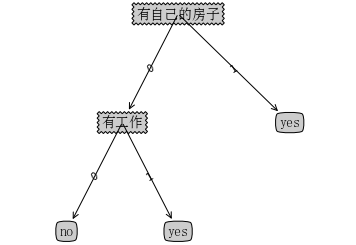

In [30]:
dataSet, labels = createDataSet()
featLabels = []
myTree = createTree(dataSet, labels, featLabels)
print(myTree)  
createPlot(myTree) 

In [34]:
def classify(inputTree,featLabels,testVec):
    firstStr=next(iter(inputTree))
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':
                classLabel=classofy(secondDict[key],featLabels,testVec)
            else:
                classLabel=secondDict[key]
    return classLabel

In [35]:
dataSet, labels = createDataSet()
featLabels = []
myTree = createTree(dataSet, labels, featLabels)
testVec = [0,1]                                        #测试数据
result = classify(myTree, featLabels, testVec)
if result == 'yes':
    print('放贷')
if result == 'no':
    print('不放贷')

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
放贷


In [41]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet: #the the number of unique elements and their occurance
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) #log base 2
    return shannonEnt
    
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet
    
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)     
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return bestFeature                      #returns an integer

def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]#stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree                            

In [43]:
fr=open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels=['age','prescript','astigmatic','tearRate']
lensesTree=createTree(lenses,lensesLabels)
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'presbyopic': 'no lenses',
        'pre': 'no lenses',
        'young': 'hard'}}}},
    'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses',
        'hyper': 'soft'}},
      'pre': 'soft',
      'young': 'soft'}}}}}}

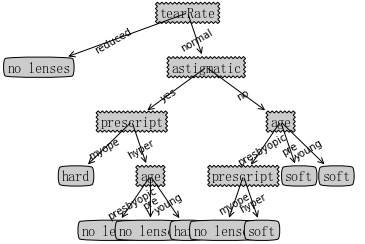

In [44]:
createPlot(lensesTree)

In [45]:
import pandas as pd

In [46]:
with open('lenses.txt','r') as fr:
    lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lenses_target=[]
for each in lenses:
    lenses_target.append(each[-1])
lensesLabels=['age','prescript','astigmatic','tearRate']
lenses_list=[]
lenses_dict={}
for each_label in lensesLabels:
    for each in lenses:
        lenses_list.append(each[lensesLabels.index(each_label)])
    lenses_dict[each_label]=lenses_list
    lenses_list=[]
print(lenses_dict)
lenses_pd=pd.DataFrame(lenses_dict)
print(lenses_pd)

{'age': ['young', 'young', 'young', 'young', 'young', 'young', 'young', 'young', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic'], 'prescript': ['myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper', 'myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper', 'myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper'], 'astigmatic': ['no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes'], 'tearRate': ['reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal']}
           age prescript astigmatic tearRate
0        young     myope         no 

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in lenses_pd.columns:
    lenses_pd[col]=le.fit_transform(lenses_pd[col])
print(lenses_pd) 

    age  prescript  astigmatic  tearRate
0     2          1           0         1
1     2          1           0         0
2     2          1           1         1
3     2          1           1         0
4     2          0           0         1
5     2          0           0         0
6     2          0           1         1
7     2          0           1         0
8     0          1           0         1
9     0          1           0         0
10    0          1           1         1
11    0          1           1         0
12    0          0           0         1
13    0          0           0         0
14    0          0           1         1
15    0          0           1         0
16    1          1           0         1
17    1          1           0         0
18    1          1           1         1
19    1          1           1         0
20    1          0           0         1
21    1          0           0         0
22    1          0           1         1
23    1         

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO
from sklearn import tree
import pandas as pd
import numpy as np
import pydotplus

In [50]:
clf=tree.DecisionTreeClassifier(max_depth=4)
clf=clf.fit(lenses_pd.values.tolist(),lenses_target)
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=lenses_pd.keys(),
                    class_names=clf.classes_,filled=True,rounded=True,
                     special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('tree.pdf')

True

In [52]:
print(clf.predict([[1,1,1,0]]))

['hard']
